# Regression Challenge

Predicting the selling price of a residential property depends on a number of factors, including the property age, availability of local amenities, and location.

In this challenge, you will use a dataset of real estate sales transactions to predict the price-per-unit of a property based on its features. The price-per-unit in this data is based on a unit measurement of 3.3 square meters.

> **Citation**: The data used in this exercise originates from the following study:
>
> *Yeh, I. C., & Hsu, T. K. (2018). Building real estate valuation models with comparative approach through case-based reasoning. Applied Soft Computing, 65, 260-271.*
>
> It was obtained from the UCI dataset repository (Dua, D. and Graff, C. (2019). [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml). Irvine, CA: University of California, School of Information and Computer Science).

## Review the data

Run the following cell to load the data and view the first few rows.

In [1]:
import pandas as pd

# load the training dataset
data = pd.read_csv('data/real_estate.csv')
data.head()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


The data consists of the following variables:

- **transaction_date** - the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)
- **house_age** - the house age (in years)
- **transit_distance** - the distance to the nearest light rail station (in meters)
- **local_convenience_stores** - the number of convenience stores within walking distance
- **latitude** - the geographic coordinate, latitude
- **longitude** - the geographic coordinate, longitude
- **price_per_unit** house price of unit area (3.3 square meters)

## Train a Regression Model

Your challenge is to explore and prepare the data, identify predictive features that will help predict the **price_per_unit** label, and train a regression model that achieves the lowest Root Mean Square Error (RMSE) you can achieve (which must be less than **7**) when evaluated against a test subset of data.

Add markdown and code cells as required to create your solution.

> **Note**: There is no single "correct" solution. A sample solution is provided in [02 - Real Estate Regression Solution.ipynb](02%20-%20Real%20Estate%20Regression%20Solution.ipynb).

In [2]:
# Your code to explore data and train a regression model

Let's start by seeing the descriptive statistics

In [4]:
data.describe()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


We can see that mean price per unit is around 38. Variability in our dataset is significant but not extremely high based on the max value of 117 and standard derivation 13.6. Now let's visualize this data. 

C:\Users\jakub.komon\AppData\Local\Temp\ipykernel_21056\4139514864.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


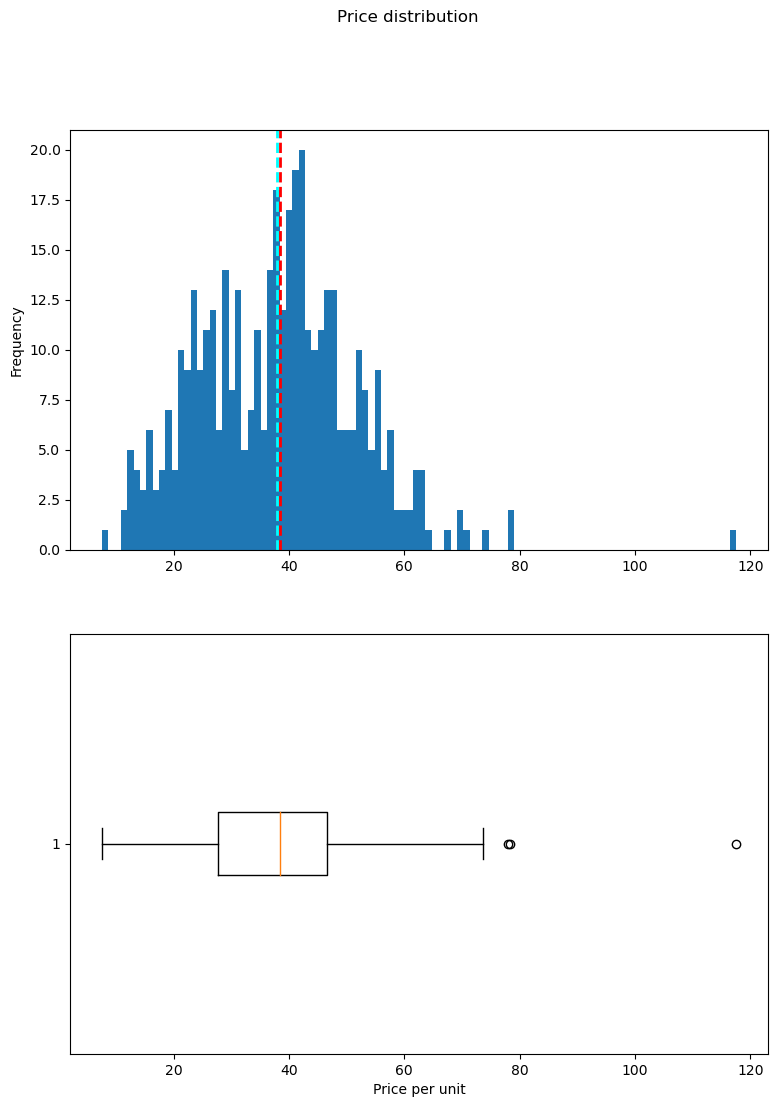

In [8]:
import matplotlib.pyplot as plt

%matplotlib inline

label = data['price_per_unit']

fig, ax = plt.subplots(2, 1, figsize = (9,12))

ax[0].hist(label, bins=100)
ax[0].set_ylabel("Frequency")
ax[0].axvline(label.mean(), color='cyan', linestyle='dashed', linewidth = 2)
ax[0].axvline(label.median(), color='red', linestyle='dashed', linewidth = 2)

ax[1].boxplot(label, vert=False)
ax[1].set_xlabel('Price per unit')

fig.suptitle('Price distribution')

fig.show()

We can see that there are few outliners in our dataset. Also it seems that the median and mean are the same so it is very likely that the dataset is normally distributed. Let's remove outliners.

C:\Users\jakub.komon\AppData\Local\Temp\ipykernel_21056\2507095022.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


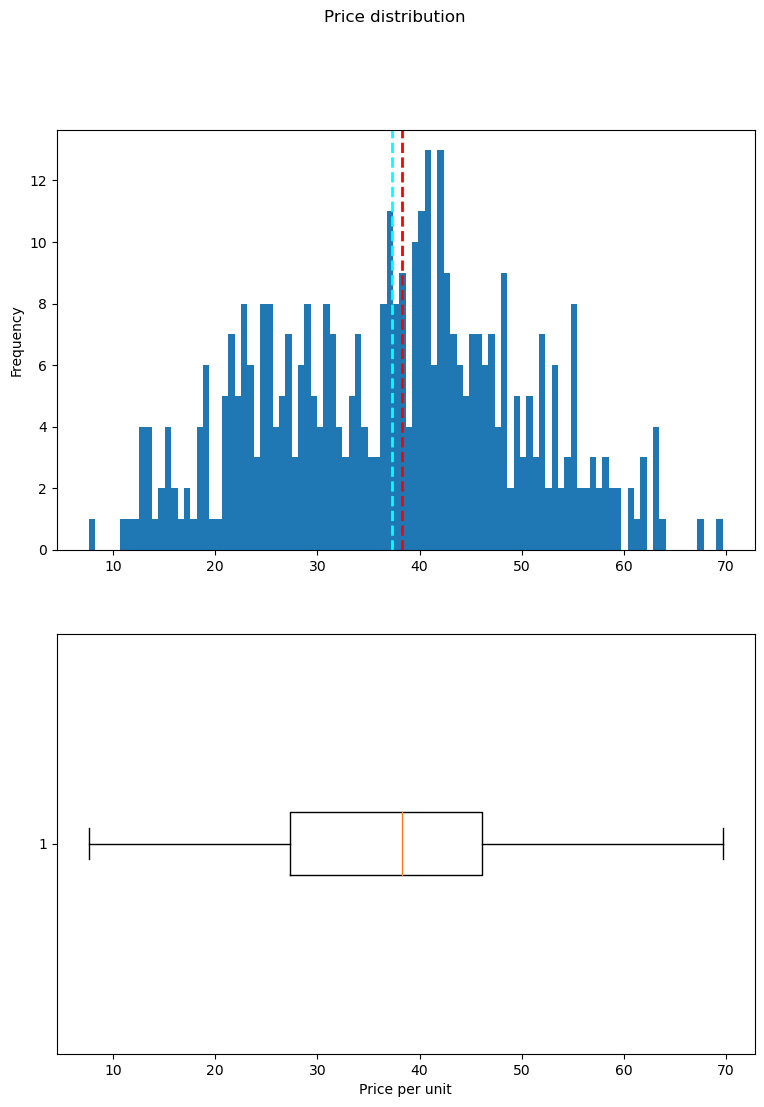

In [11]:
data = data[data['price_per_unit']<70]
label = data['price_per_unit']

fig, ax = plt.subplots(2, 1, figsize = (9,12))

ax[0].hist(label, bins=100)
ax[0].set_ylabel("Frequency")
ax[0].axvline(label.mean(), color='cyan', linestyle='dashed', linewidth = 2)
ax[0].axvline(label.median(), color='red', linestyle='dashed', linewidth = 2)

ax[1].boxplot(label, vert=False)
ax[1].set_xlabel('Price per unit')

fig.suptitle('Price distribution')

fig.show()

Let's do the same for the numeric features

In [ ]:
numeric_features = []

## Use the Trained Model

Save your trained model, and then use it to predict the price-per-unit for the following real estate transactions:

| transaction_date | house_age | transit_distance | local_convenience_stores | latitude | longitude |
| ---------------- | --------- | ---------------- | ------------------------ | -------- | --------- |
|2013.167|16.2|289.3248|5|24.98203|121.54348|
|2013.000|13.6|4082.015|0|24.94155|121.50381|

In [3]:
# Your code to use the trained model